<a href="https://colab.research.google.com/github/tushjai97/tushjai97/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')

x = dataset.iloc[: , 1:-1].values
y = dataset.iloc[: , -1].values

In [ ]:
print (x)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(10,1)


In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [ ]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()
x = ss_x.fit_transform(x)
y = ss_y.fit_transform(y)

In [ ]:
print (x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
transformed_input = ss_x.transform( [ [ 6.5 ] ] ) 
predicted_salary = regressor.predict(transformed_input)
predicted_salary = predicted_salary.reshape(-1,1)
z = ss_y.inverse_transform(predicted_salary)

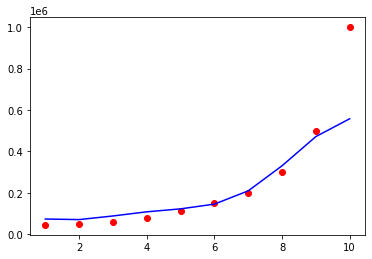

In [ ]:

plt.scatter(ss_x.inverse_transform(x),ss_y.inverse_transform(y), color = 'red')
plt.plot(ss_x.inverse_transform(x), ss_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')

Higher resolution curve

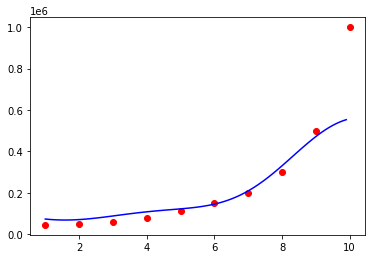

In [ ]:
x_grid = np.arange(min(ss_x.inverse_transform(x)),max(ss_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(ss_x.inverse_transform(x),ss_y.inverse_transform(y), color = 'red')

a = ss_y.inverse_transform(regressor.predict(ss_x.transform(x_grid)).reshape(-1,1))
plt.plot(x_grid, a, color = 'blue')


